In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/combined/ML-c-train.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44164 entries, 0 to 44163
Columns: 274 entries, yellow sputum to conflicting_diseases
dtypes: int64(271), object(3)
memory usage: 92.3+ MB
None


# Visualize Data Distribution

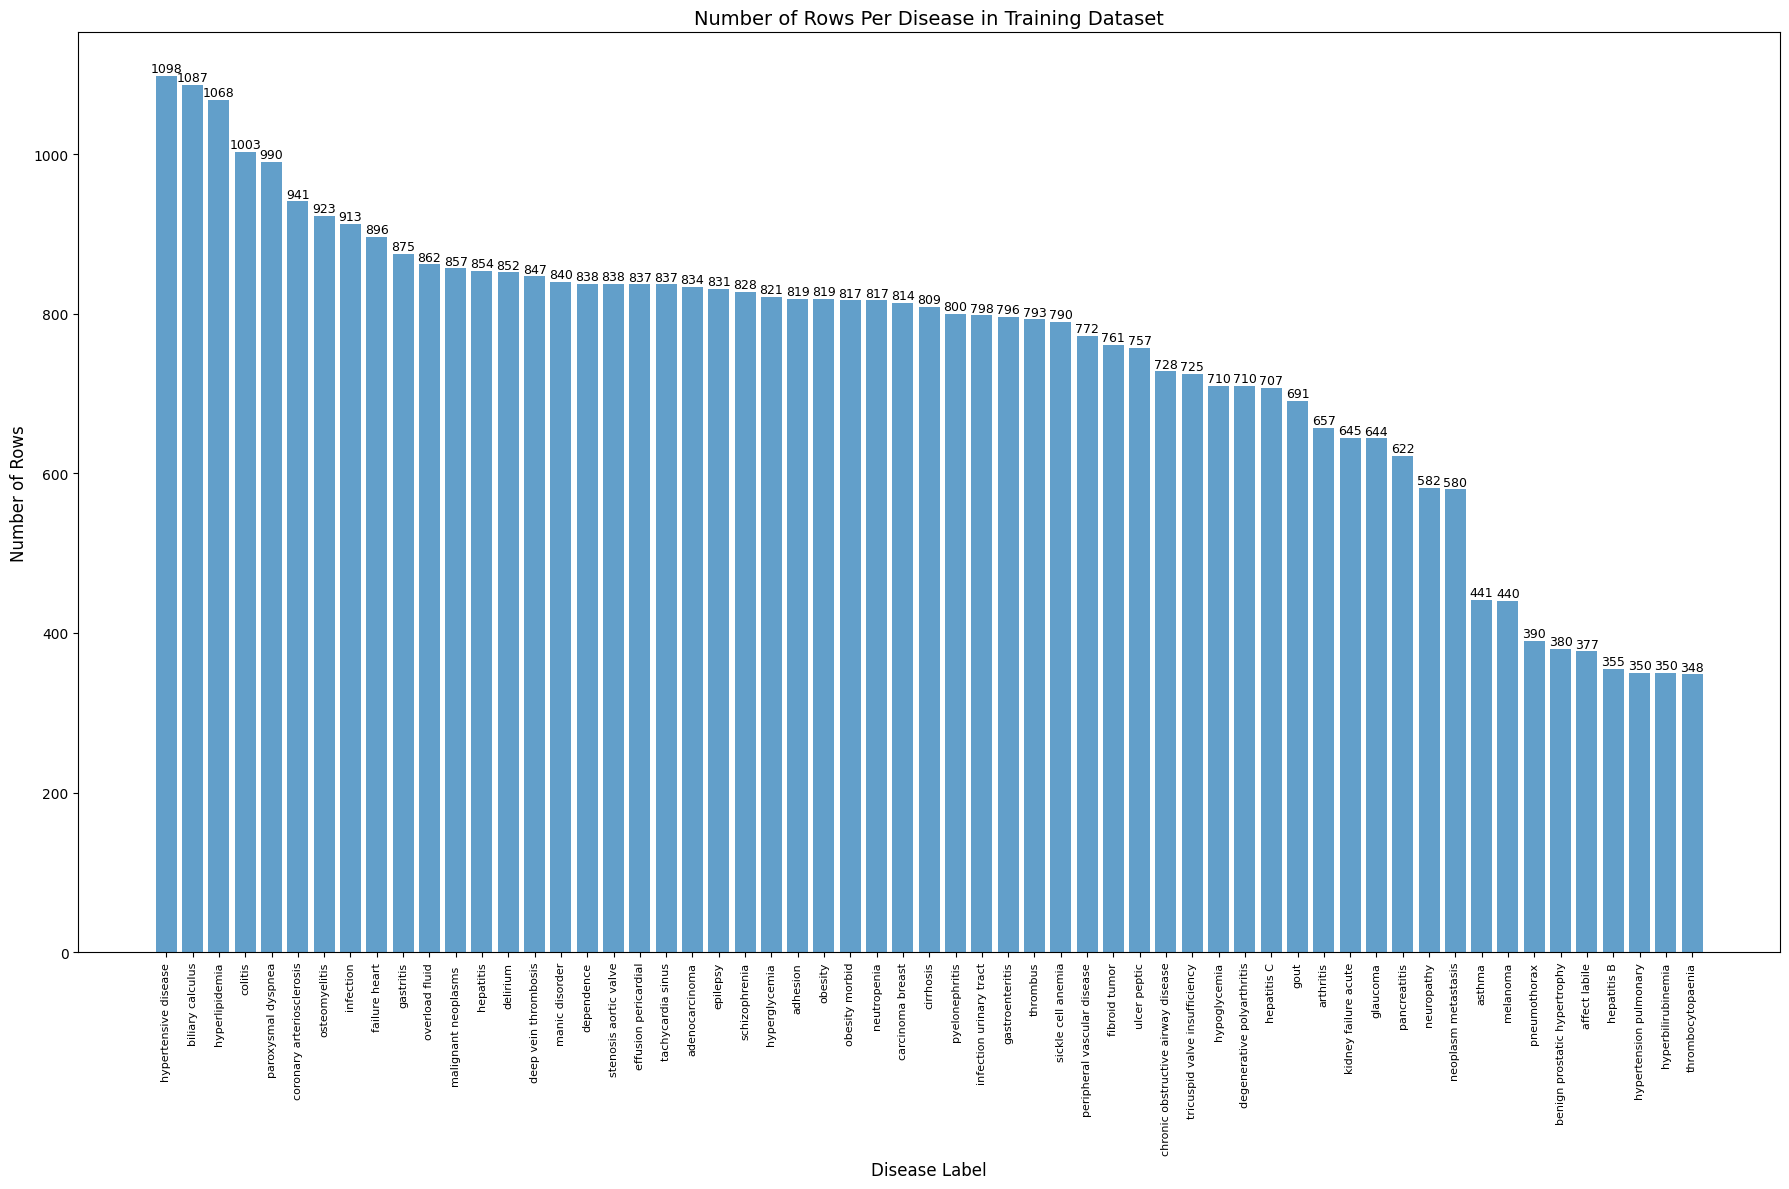

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Naive Bayes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/combined/ML-c-train.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/combined/ML-c-val.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/combined/ML-c-test.csv")

# Separate features and target
X_train, y_train = train_data.drop(columns=["disease_label"]), train_data["disease_label"]
X_valid, y_valid = valid_data.drop(columns=["disease_label"]), valid_data["disease_label"]
X_test, y_test = test_data.drop(columns=["disease_label"]), test_data["disease_label"]

# Ensure all feature columns are numeric
X_train = X_train.select_dtypes(include=["number"])
X_valid = X_valid.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Ensure the same columns in all splits
common_columns = X_train.columns.intersection(X_valid.columns).intersection(X_test.columns)
X_train = X_train[common_columns]
X_valid = X_valid[common_columns]
X_test = X_test[common_columns]

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# **Optional**: Use validation set to tune hyperparameters manually
# Evaluate on validation set (for tuning, NOT for final performance reporting)
y_valid_pred = nb_model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy:.2f}")

# Validate the Model
y_valid_pred = nb_model.predict(X_valid)
val_report = classification_report(y_valid, y_valid_pred)
print("Validation Report NB:")
print(val_report)

# Evaluate on test set (for final performance reporting)
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (final evaluation): {test_accuracy:.2f}")

# Print a detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.89
Validation Report NB:
                                    precision    recall  f1-score   support

                    adenocarcinoma       0.98      0.96      0.97       163
                          adhesion       0.94      0.93      0.94       164
                     affect labile       0.96      0.91      0.94        79
                         arthritis       0.92      1.00      0.96       131
                            asthma       1.00      1.00      1.00        71
      benign prostatic hypertrophy       1.00      0.95      0.97        79
                  biliary calculus       0.72      0.89      0.80       190
                  carcinoma breast       0.98      0.94      0.96       170
chronic obstructive airway disease       0.81      0.92      0.86       143
                         cirrhosis       0.98      0.97      0.97       170
                           colitis       1.00      0.79      0.88       190
         coronary arteriosclerosis     

# Generate Classification Report

In [5]:

import pandas as pd
from sklearn.metrics import classification_report

# Assuming rf_model is your trained model, and X_test, y_test are defined
y_pred = nb_model.predict(X_test)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the classification report as a CSV file
report_df.to_csv("/content/drive/MyDrive/P2/T1/Dataset/combined/ML/NB-c-class.csv", index=True)

print("Classification report saved to 'NBclassification_report.csv'")



Classification report saved to 'NBclassification_report.csv'
